In [113]:
#Set 1
import numpy as np
import pandas as pd

df=pd.DataFrame({
    'Name':['Balu', 'Ram', 'Shyam', 'Rashi', 'Bhanu'],
    'Marks':[91, 76, 82, 68, 52],
    'Department':['CSE', 'ECE', 'CIC', 'CSE','CSE'],
    'Year':[2023, 2024, 2022, 2023, 2025]
}
)
df.set_index(['Department','Year'], inplace=True)
print(df)
df.loc['CSE', 2023]


                  Name  Marks
Department Year              
CSE        2023   Balu     91
ECE        2024    Ram     76
CIC        2022  Shyam     82
CSE        2023  Rashi     68
           2025  Bhanu     52


C:\Users\utanv\AppData\Local\Temp\ipykernel_1528\3821183010.py:14: PerformanceWarning: indexing past lexsort depth may impact performance.
  df.loc['CSE', 2023]


Name  Marks
Department Year              
CSE        2023   Balu     91
           2023  Rashi     68

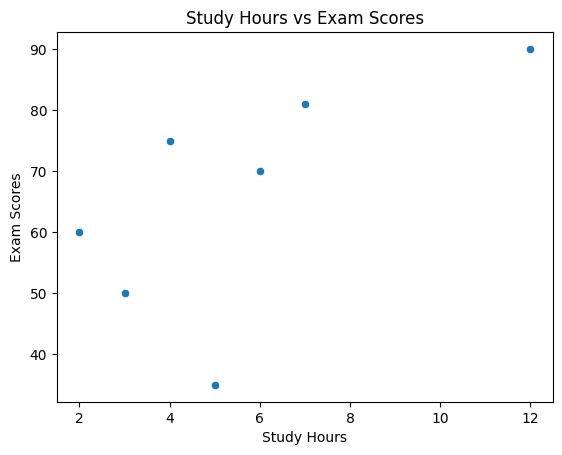

In [114]:

#Set 1 Q2.
import matplotlib.pyplot as plt
import seaborn as sns
study=pd.DataFrame({
    'study_hours':[3, 4, 2, 5, 7, 6, 12],
    'Exam_Scores':[50, 75, 60, 35, 81,70, 90 ]
})
sns.scatterplot(x='study_hours', y='Exam_Scores', data=study)
plt.title('Study Hours vs Exam Scores')
plt.xlabel('Study Hours')
plt.ylabel('Exam Scores')
plt.show()

In [115]:
#Set 2

df1=pd.DataFrame({
    'Name':['Tanu', 'Manu', 'Kokila', 'Ramu', 'Suresh'],
    'Roll No':[101, 102, 103, 104, 105],
    'Department':['CSE', 'ECE', 'CIC', 'IT', 'AIDS']
})
df2=pd.DataFrame({
    'Roll No':[101, 102, 103, 104, 105],
    'Semester':['III','III', 'I','VII', 'V']
})
merged=pd.merge(df1, df2, how='outer')
merged


,Name,Roll No,Department,Semester
0,Tanu,101,CSE,III
1,Manu,102,ECE,III
2,Kokila,103,CIC,I
3,Ramu,104,IT,VII
4,Suresh,105,AIDS,V


In [116]:
df_s=merged.stack()
df_s

0  Name            Tanu
   Roll No          101
   Department       CSE
   Semester         III
1  Name            Manu
   Roll No          102
   Department       ECE
   Semester         III
2  Name          Kokila
   Roll No          103
   Department       CIC
   Semester           I
3  Name            Ramu
   Roll No          104
   Department        IT
   Semester         VII
4  Name          Suresh
   Roll No          105
   Department      AIDS
   Semester           V
dtype: object

<Axes: >

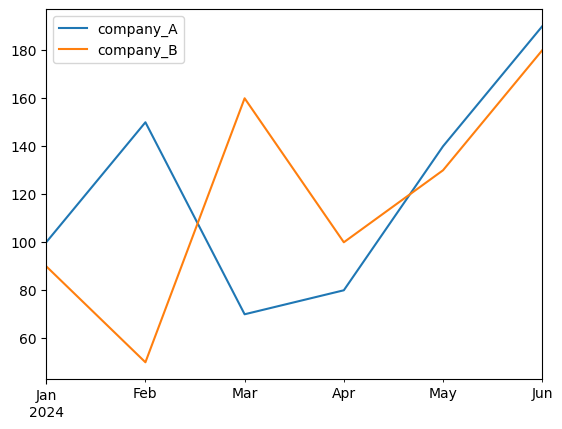

In [117]:
#Set 2 Q2.
import pandas as pd
sales=pd.DataFrame({
    'company_A':[100, 150, 70, 80, 140, 190],
    'company_B':[90, 50, 160, 100, 130, 180]
},index=pd.date_range("2024-01-01", periods=6, freq='ME')) #Use Time Series as index of the DataFrame
sales.plot()

In [118]:
#Set 3 Q1. Concatenate 3 different Dataframes of monthly sales (jan, feb, mar) into one quarter 
# using hierarchical indexing. Find Mean Sales of Each Month
import pandas as pd
jan=pd.DataFrame({
    'Stores':['A', 'B', 'C', 'D', 'E'],
    'Sales':[100, 210, 160, 170, 180]
})

feb=pd.DataFrame({
    'Stores':['A', 'B', 'C', 'D', 'E'],
    'Sales':[150, 450, 300, 700, 210]
})

march=pd.DataFrame({
    'Stores':['A', 'B', 'C', 'D', 'E'],
    'Sales':[130, 200, 250, 600, 810]
})
quarter=pd.concat([jan, feb, march], keys=["Jan", "Feb", "March"], names=['Month', 'Row'])
quarter
mean_sales=quarter["Sales"].groupby(level="Month").mean()
mean_sales


Month
Feb      362.0
Jan      164.0
March    398.0
Name: Sales, dtype: float64

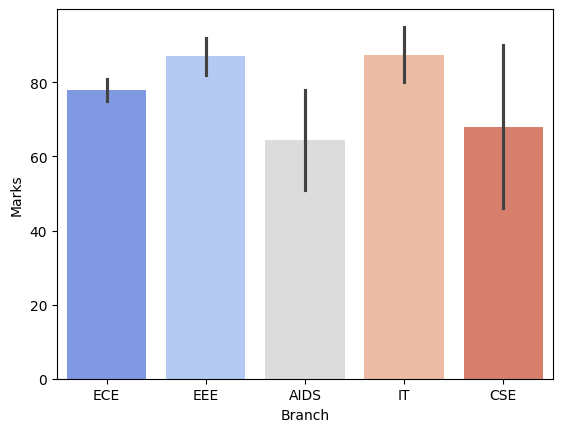

In [119]:
#Set 3
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

marks=pd.DataFrame({
    'Branch':['ECE', 'EEE', 'AIDS', 'IT', 'CSE', 'IT', 'CSE', 'AIDS', 'ECE', 'EEE'],
    'Marks':[75, 82, 51, 80, 90, 95, 46, 78, 81, 92]
})
grouped=marks.groupby('Branch')
avg_marks=grouped['Marks'].mean()
sns.barplot(x='Branch', y='Marks', data=marks, palette='coolwarm', hue='Branch')
plt.xlabel("Branch")
plt.ylabel("Marks")
plt.show()

In [120]:
#Set 4
import pandas as pd
df1=pd.DataFrame({
    'Name':['Raju', 'Suresh', 'Girish', 'Sudhir', 'Nani'],
    'Emp ID':[101, 102, 103, 104, 105],
    'Experience (in years)':[2, 5, 4, 3, 7]
})
df2=pd.DataFrame({
    'Emp ID':[101, 102, 104, 105, 106],
    'City':['Mumbai', 'Chennai', 'Hyderabad', 'Delhi', 'Hyderabad'],
    'Salary':[10000, 20000, 50000, 40000, 80000]
})
merged=pd.merge(df1, df2, how='outer')


In [121]:
pivoted=merged.pivot(index='Emp ID', columns='City', values='Salary')


In [122]:
import pandas as pd
traffic=pd.read_csv("C:/Users/utanv/Downloads/Open_Data_Website_Traffic.csv")
traffic['Date']=pd.to_datetime(traffic['Date'])
monthly_traffic=traffic.resample('ME', on='Date').mean()
monthly_traffic.fillna(method='ffill', inplace=True)

C:\Users\utanv\AppData\Local\Temp\ipykernel_1528\2402856697.py:5: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  monthly_traffic.fillna(method='ffill', inplace=True)


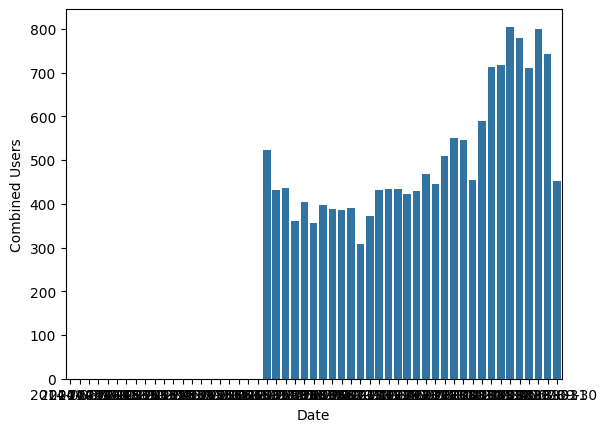

In [123]:
import matplotlib.pyplot as plt 
import seaborn as sns
sns.barplot(x='Date', y='Combined Users', data=monthly_traffic)
plt.show()

In [126]:
#Set 5
sales_data=pd.read_csv('sales_data.csv')
sales_data
grouped=sales_data.groupby(['Product'])
total_sales=grouped['Sales'].mean()
total_sales

Product
A    160.0
B     90.0
C    150.0
Name: Sales, dtype: float64

<Axes: >

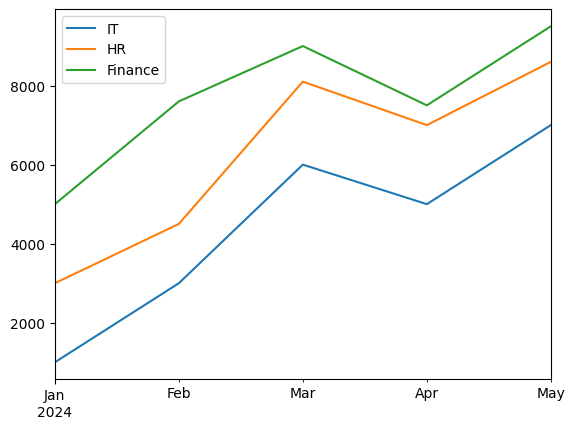

In [128]:
import matplotlib.pyplot as plt
import seaborn as sns 
dept=pd.DataFrame({
    'IT':[1000, 3000, 6000, 5000, 7000],
    'HR':[3000, 4500, 8100, 7000, 8600],
    'Finance':[5000, 7600, 9000, 7500, 9500]
},index=pd.date_range("2024-01-01", periods=5, freq='ME'))
dept.plot()

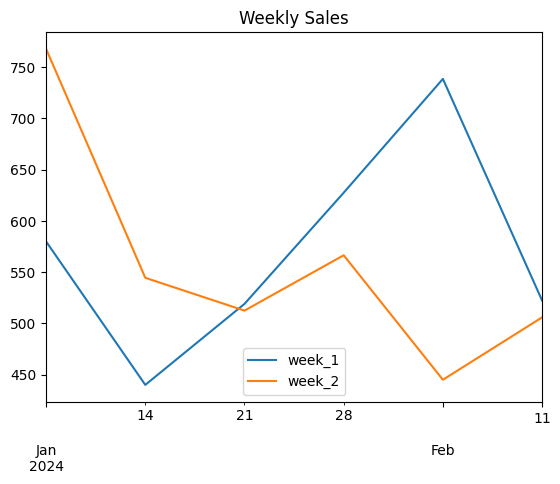

In [146]:
#Set 7
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

weekly_sales=pd.DataFrame({
    'week_1':np.random.randint(100, 1000, size=42), #Do not pass as lists ([])
    'week_2':np.random.randint(100, 1000, size=42)
}, index=pd.date_range('01-01-2024', periods=42, freq='D'))
weekly_sales.resample('W').mean().plot(title='Weekly Sales')
plt.show()


In [ ]:
age_salary=pd.DataFrame({
    'Age':[25, 36, 45, 52, 60],
    'Experience':[5, 10, 12, 15, 18],
    'Salary':[50000, 100000, 150000, ]
})